# Calculating gradient descent using PyTorch 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import torch
iris = datasets.load_iris()

X = torch.tensor(iris.data,dtype=torch.float32)
T = torch.tensor(iris.target,dtype=torch.long)

C= len(set(list(T)))
F = X.shape[1]

In [ ]:
#Let us also initialize the weight matrix $W$ as a $C\times F$ random `Pytorch` matrix. 
W= torch.randn(C,F,requires_grad=True,dtype=torch.float32)
#Only difference from before is this mysterious option flag requires_grad that is set to True. We will see what this does shortly. As before, we will focus on a single datapoint  x,t .

In [ ]:
x=X[0]
t=T[0]
p=torch.exp(W @ x)
y = p/sum(p)
L = -torch.log(y[t])

Again, notice how this is all identical to the equivalent numpy code above. The only difference being that we must call the tensor versions of exp, log etc because we are dealing with Pytorch tensors instead of numpy arrays.

Now instead of going to the trouble of computing the gradient of  L  with respect to  W , we only have to execute a single (magic) line of code:

In [ ]:
L.backward()

and we're done! Of course you will ask, where is the gradient? We didn't define any dW variable! The answer is that Pytorch, very conveniently automatically calculates the gradient and hides it in a specially defined .grad attribute. So in our case the gradient can be found in

In [ ]:
print(W.grad)

tensor([[-5.1000e+00, -3.5000e+00, -1.4000e+00, -2.0000e-01],
        [ 4.2820e-10,  2.9386e-10,  1.1755e-10,  1.6792e-11],
        [ 4.4988e-07,  3.0874e-07,  1.2350e-07,  1.7643e-08],
        [ 1.5980e-10,  1.0967e-10,  4.3867e-11,  6.2667e-12],
        [ 5.2638e-04,  3.6124e-04,  1.4450e-04,  2.0642e-05],
        [ 1.7278e-07,  1.1858e-07,  4.7431e-08,  6.7759e-09],
        [ 7.1163e-05,  4.8837e-05,  1.9535e-05,  2.7907e-06],
        [ 1.0841e-10,  7.4401e-11,  2.9760e-11,  4.2515e-12],
        [ 8.2461e-10,  5.6591e-10,  2.2636e-10,  3.2338e-11],
        [ 4.5206e-08,  3.1024e-08,  1.2409e-08,  1.7728e-09],
        [ 1.0777e-06,  7.3958e-07,  2.9583e-07,  4.2262e-08],
        [ 5.1212e-09,  3.5146e-09,  1.4058e-09,  2.0083e-10],
        [ 3.1028e-10,  2.1294e-10,  8.5174e-11,  1.2168e-11],
        [ 1.1105e-04,  7.6211e-05,  3.0484e-05,  4.3549e-06],
        [ 5.5803e-07,  3.8296e-07,  1.5318e-07,  2.1883e-08],
        [ 2.0686e-08,  1.4196e-08,  5.6786e-09,  8.1122e-10],
        

That's pretty neat right? What's more, every time we call the .backward() method on a value we just computed, Pytorch knows that it has to calculate gradients for all tensors that played a part in that computation and these gradients are accumulated additively. All of them? I hear you ask. Well actually that would be too computationally heavy. Instead, Pytorch does this only for tensors that have been defined with the requires_grad flag set to True. So we just need to remember to set that flag for all model parameters, all tensors we would like to modify in order to minimize our loss function.

All this basically means that the only thing we need to do is come up with the appropriate loss function for a dataset and problem, write down the code that computes it (known as the forward step) and Pytorch will calculate the gradients (known as the backward step). I hope you take a moment to apreciate just how wonderfully elegant the scheme is!

Putting everything in a loop around the dataset we now get code that looks like the following:

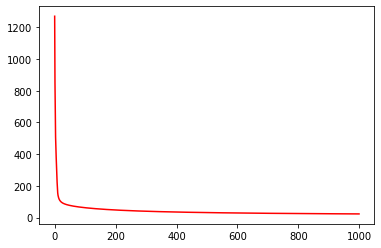

In [ ]:
Ls=[]

W = torch.randn(C,F,requires_grad=True,dtype=torch.float32)
alpha = 5e-4
for e in range(1000):
  Ltot = 0.0
  for x,t in zip(X,T):
    p=torch.exp(W @ x)
    y = p/sum(p)
    L = -torch.log(y[t])
    L.backward() # This is where all the magic happens
    Ltot += L.item()
  W.data -= alpha*W.grad # gradient descent step
  W.grad.data.zero_() # we need to remember to set the gradient to zero (pytorch)
                      # cannot know when our loss function computation is complete
  Ls.append(Ltot)
plt.plot(Ls,'r-')